# RADHIKA MAKHARIA

# TASK 6: Prediction using Decision Tree Algorithm

# 1) Importing Libraries and dataset

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Importing iris dataset
iris = load_iris()
iris_data = pd.DataFrame(iris.data, columns = iris.feature_names)

In [3]:
# Let's check how our data looks..!
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# Now adding our target variable.
iris_data["Species"] = iris["target"]

# Applying lambda function to convert target values.
iris_data["Species"] = iris_data["Species"].apply(lambda x: iris["target_names"][x])

In [5]:
# Data loaded successfully...!
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# 2) Exploratory Data Analysis

In [6]:
# Data summary
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# checking data types and any missing values.
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


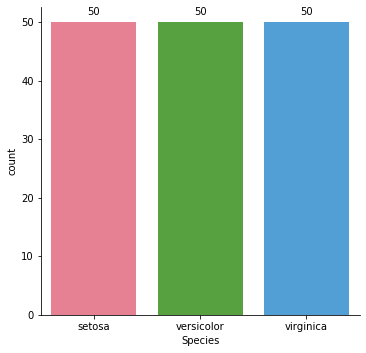

In [8]:
# we are using catplot to differentiate types of iris species.
plots = sns.catplot(x="Species", kind="count", data = iris_data,palette="husl")
for ax in plots.axes.ravel():
    for p in ax.patches:
        ax.annotate(format(p.get_height()), 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

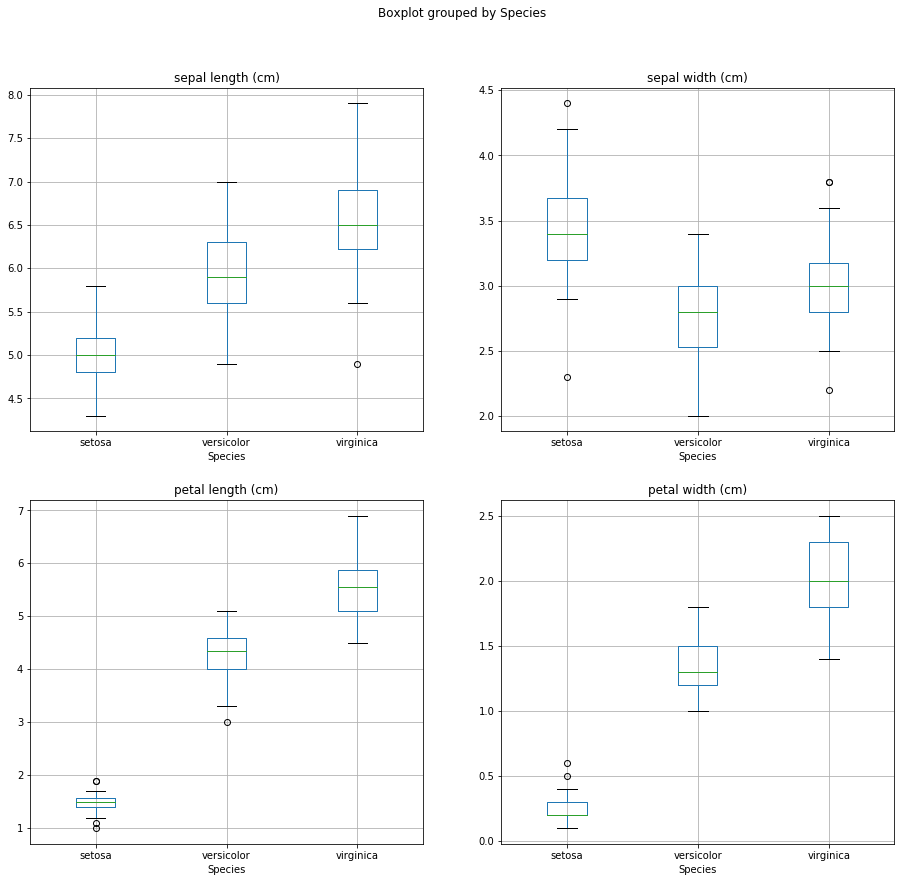

In [9]:
fig, axes = plt.subplots(2,2) 
fig.set_figheight(14)
fig.set_figwidth(15)

for i,col in enumerate(list(iris_data.columns.values)[:-1]):
    a = iris_data.boxplot(col, by="Species", ax=axes.flatten()[i])

plt.show()

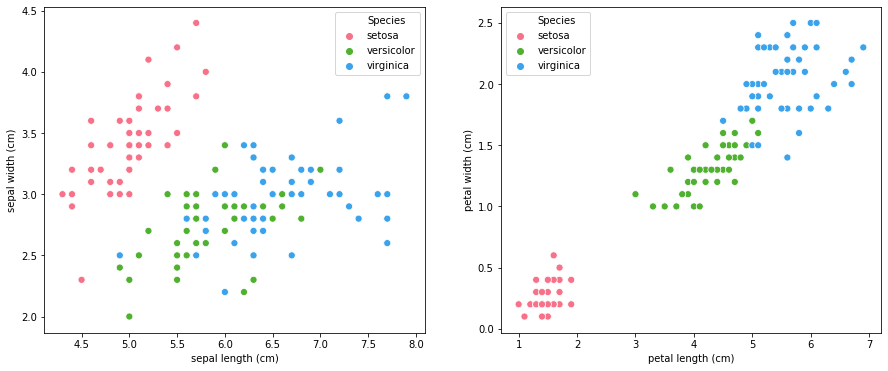

In [10]:
fig, axes = plt.subplots(1,2) 
fig.set_figheight(6)
fig.set_figwidth(15)

# for sepal length vs sepal width
sns.scatterplot(iris_data['sepal length (cm)'], iris_data['sepal width (cm)'], hue = iris_data['Species'],palette="husl", s= 50, ax=axes[0]);

# for petal length vs petal width
sns.scatterplot(iris_data['petal length (cm)'], iris_data['petal width (cm)'], hue = iris_data['Species'],palette="husl", s= 50, ax=axes[1]);

# 3)Locating dependent and independent variables¶

In [11]:
X = iris_data.iloc[:,:-1]
y = iris_data.iloc[:,-1]

In [12]:

X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
y[:5]

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: Species, dtype: object

In [14]:
# splitting the data by giving test size as 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [15]:
print("X_train :", X_train.shape, "y_train :", y_train.shape)
print("X_test  :", X_test.shape, " y_test  :", y_test.shape)

X_train : (105, 4) y_train : (105,)
X_test  : (45, 4)  y_test  : (45,)


In [16]:
# fitting our Decision tree model on train set
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [17]:
# making predictions on test set
y_pred = model.predict(X_test)

In [18]:
# Let's see the difference between actual and predicted values.
prediction = pd.DataFrame({"Actual":y_test, "Predicted":y_pred})
prediction.head(10)

,Actual,Predicted
114,virginica,virginica
62,versicolor,versicolor
33,setosa,setosa
107,virginica,virginica
7,setosa,setosa
100,virginica,virginica
40,setosa,setosa
86,versicolor,versicolor
76,versicolor,versicolor
71,versicolor,versicolor


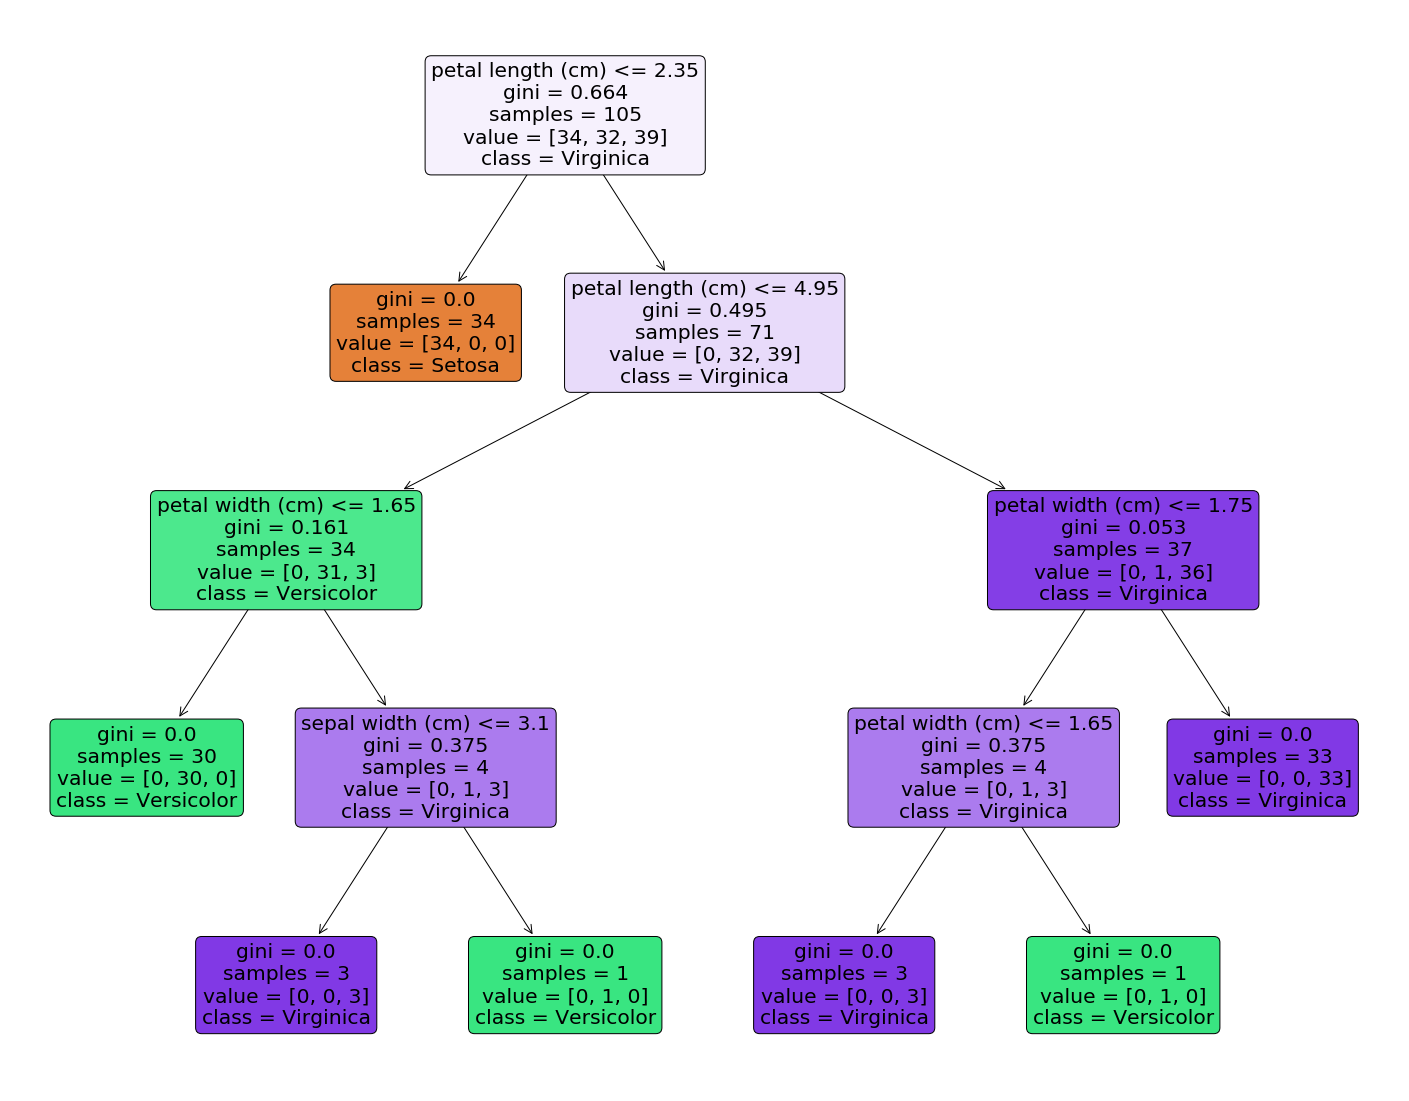

In [19]:
plt.figure(figsize = (25,20))
d_tree = tree.plot_tree(model, 
                        feature_names = iris_data.columns, 
                        class_names = ["Setosa","Versicolor","Virginica"],
                        filled = True,
                        rounded = True);

In [20]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9777777777777777

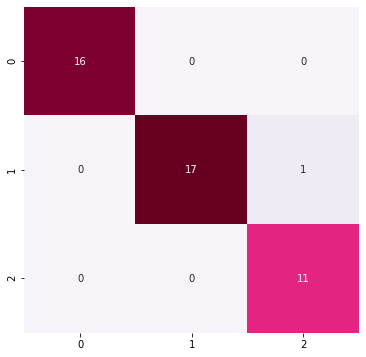

In [21]:
# Let's take a look at confusion matix
conf_matrix = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize = (6,6))
sns.heatmap(conf_matrix, annot=True,cmap="PuRd", cbar=False)